<a href="https://colab.research.google.com/github/NickMuhigi/Summative_Intro_To_ML_assignment.ipynb/blob/main/Summative_Intro_to_ml_%5BNicolas_Muhigi%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam

import io
from IPython.display import display
import ipywidgets as widgets

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [28]:
import io
from IPython.display import display
import ipywidgets as widgets

upload = widgets.FileUpload(accept='.csv', multiple=False)
display(upload)

def handle_upload(upload_widget):
    if upload_widget.value:
        name = list(upload_widget.value.keys())[0]
        content = upload_widget.value[name]['content']
        return pd.read_csv(io.BytesIO(content))
    else:
        return None

FileUpload(value={}, accept='.csv', description='Upload')

In [29]:
df = handle_upload(upload)

if df is not None:
    df['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')
    df = df.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Depth'])
    df['HighMag'] = (df['Magnitude'] >= 6.0).astype(int)
    df = df[['Latitude', 'Longitude', 'Depth', 'Magnitude', 'HighMag']]
    display(df.head())
else:
    print("❌ Please upload the dataset first.")

,Latitude,Longitude,Depth,Magnitude,HighMag
0,19.246,145.616,131.6,6.0,1
1,1.863,127.352,80.0,5.8,0
2,-20.579,-173.972,20.0,6.2,1
3,-59.076,-23.557,15.0,5.8,0
4,11.938,126.427,15.0,5.8,0


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [30]:
def define_model(optimizer='adam', use_regularizer=False, early_stopping=False, dropout=0.0, learning_rate=0.001):
    model = Sequential()
    reg = l2(0.002) if use_regularizer else None

    model.add(Dense(64, activation='relu', input_shape=(4,), kernel_regularizer=reg))
    if dropout > 0:
        model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu', kernel_regularizer=reg))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        opt = Nadam(learning_rate=learning_rate)
    else:
        opt = Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_loss', patience=6, min_delta=0.002)] if early_stopping else []

    history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), verbose=1, callbacks=callbacks)
    return model, history

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [31]:
def loss_curve_plot(history):
    plt.plot(history.history['loss'], 'bo', label='Training loss')
    plt.plot(history.history['val_loss'], 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [32]:
X = df[['Latitude', 'Longitude', 'Depth', 'Magnitude']]
y = df['HighMag']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6216 - loss: 1.3911 - val_accuracy: 0.6723 - val_loss: 0.6449
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6439 - loss: 0.6968 - val_accuracy: 0.6908 - val_loss: 0.6697
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6573 - loss: 0.6823 - val_accuracy: 0.6421 - val_loss: 0.6724
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6721 - loss: 0.6653 - val_accuracy: 0.7127 - val_loss: 0.5978
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6831 - loss: 0.6307 - val_accuracy: 0.6728 - val_loss: 0.6184
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6854 - loss: 0.6258 - val_accuracy: 0.7130 - val_loss: 0.5935
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6932 - loss: 0.6165 - val_accuracy: 0.6686 - val_loss: 0.5993
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6852 - loss: 0.6377 - val_accuracy: 0.

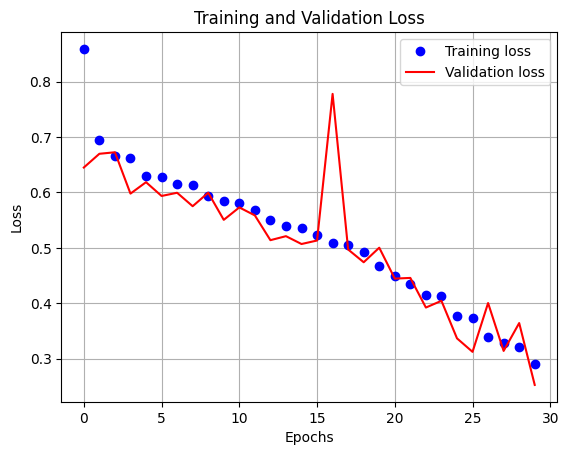

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2371
           1       0.98      0.77      0.86      1141

    accuracy                           0.92      3512
   macro avg       0.94      0.88      0.90      3512
weighted avg       0.92      0.92      0.92      3512



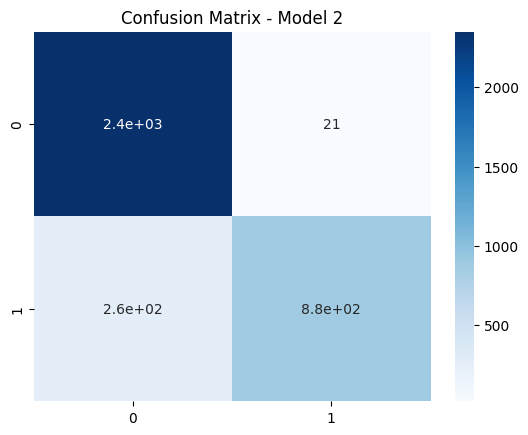

In [33]:
model_2, history_2 = define_model(optimizer='adam', early_stopping=True)
loss_curve_plot(history_2)

y_pred_2 = (model_2.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_2))

sns.heatmap(confusion_matrix(y_test, y_pred_2), annot=True, cmap='Blues')
plt.title("Confusion Matrix - Model 2")
plt.show()

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


513/513 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5878 - loss: 1.3488 - val_accuracy: 0.5438 - val_loss: 0.8580
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6178 - loss: 0.8084 - val_accuracy: 0.5487 - val_loss: 0.9415
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6409 - loss: 0.7649 - val_accuracy: 0.6748 - val_loss: 0.7027
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6406 - loss: 0.7257 - val_accuracy: 0.6708 - val_loss: 0.6283
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6531 - loss: 0.6969 - val_accuracy: 0.6745 - val_loss: 0.7163
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6610 - loss: 0.6778 - val_accuracy: 0.4450 - val_loss: 1.1661
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6788 - loss: 0.6453 - val_accuracy: 0.7064 - val_loss: 0.6076
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6941 - loss: 0.6167 - val_accuracy: 0.6757 - val_

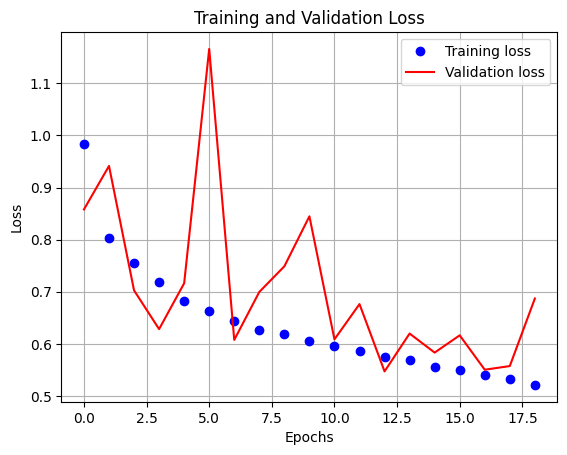

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.72      0.94      0.82      2371
           1       0.66      0.23      0.34      1141

    accuracy                           0.71      3512
   macro avg       0.69      0.59      0.58      3512
weighted avg       0.70      0.71      0.66      3512



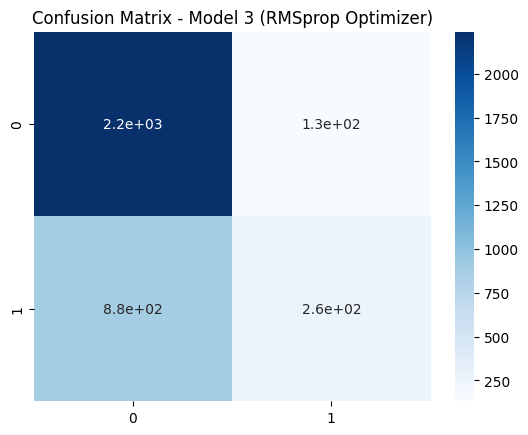

In [34]:
model_3, history_3 = define_model(optimizer='rmsprop', use_regularizer=False, early_stopping=True)
loss_curve_plot(history_3)

y_pred_3 = (model_3.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_3))

sns.heatmap(confusion_matrix(y_test, y_pred_3), annot=True, cmap='Blues')
plt.title("Confusion Matrix - Model 3 (RMSprop Optimizer)")
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6260 - loss: 1.3162 - val_accuracy: 0.6879 - val_loss: 0.7805
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6403 - loss: 0.7382 - val_accuracy: 0.6771 - val_loss: 0.6168
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6628 - loss: 0.6650 - val_accuracy: 0.6925 - val_loss: 0.6076
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6737 - loss: 0.6560 - val_accuracy: 0.7153 - val_loss: 0.6261
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6827 - loss: 0.6310 - val_accuracy: 0.7047 - val_loss: 0.6023
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6736 - loss: 0.6429 - val_accuracy: 0.6780 - val_loss: 0.7662
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6978 - loss: 0.6170 - val_accuracy: 0.7281 - val_loss: 0.5905
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7071 - loss: 0.6007 - val_accuracy: 0.

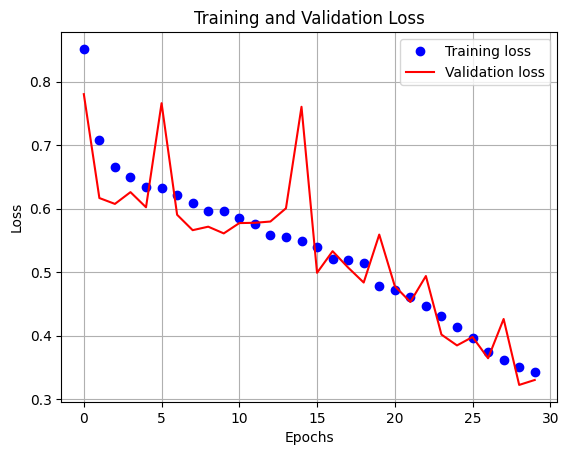

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2371
           1       0.85      0.68      0.76      1141

    accuracy                           0.86      3512
   macro avg       0.86      0.81      0.83      3512
weighted avg       0.86      0.86      0.85      3512



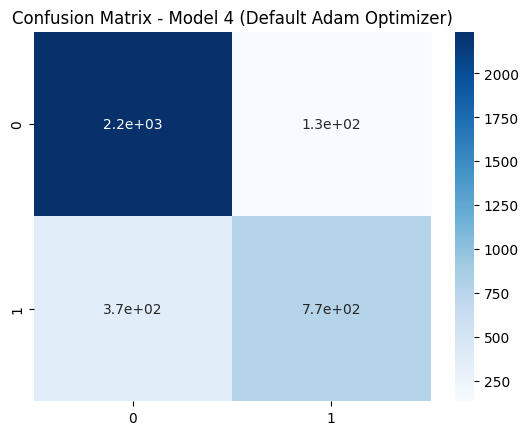

In [35]:
model_4, history_4 = define_model(optimizer='adam', use_regularizer=False, early_stopping=True)
loss_curve_plot(history_4)

y_pred_4 = (model_4.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_4))

sns.heatmap(confusion_matrix(y_test, y_pred_4), annot=True, cmap='Blues')
plt.title("Confusion Matrix - Model 4 (Default Adam Optimizer)")
plt.show()

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
=== Model 2 (Adam + Reg) Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2371
           1       0.78      0.88      0.83      1141

    accuracy                           0.88      3512
   macro avg       0.86      0.88      0.87      3512
weighted avg       0.89      0.88      0.88      3512

Model 2 (Adam + Reg) F1 Score: 0.8265


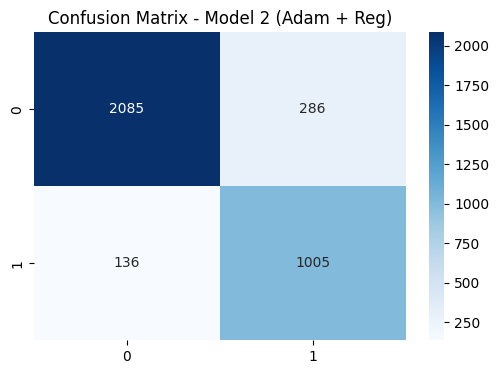

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
=== Model 3 (RMSprop, no Reg) Classification Report ===
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      2371
           1       0.89      0.38      0.54      1141

    accuracy                           0.78      3512
   macro avg       0.83      0.68      0.70      3512
weighted avg       0.81      0.78      0.75      3512

Model 3 (RMSprop, no Reg) F1 Score: 0.5355


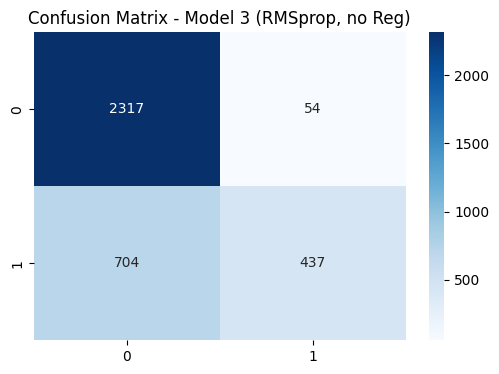

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
=== Model 4 (Adam, no Reg) Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2371
           1       0.85      0.68      0.76      1141

    accuracy                           0.86      3512
   macro avg       0.86      0.81      0.83      3512
weighted avg       0.86      0.86      0.85      3512

Model 4 (Adam, no Reg) F1 Score: 0.7559


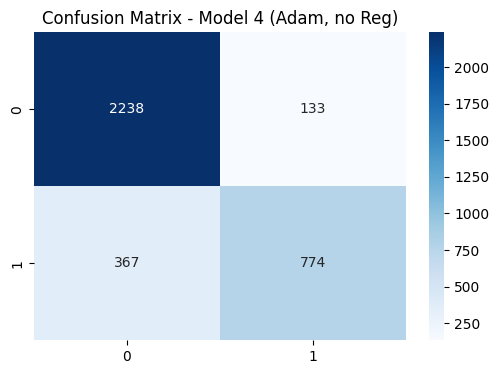

Best model selected: Model 2 (Adam + Reg) with F1 Score: 0.8265


Best model saved as 'best_earthquake_model.h5'
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
=== Classification Report for Loaded Model ===
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2371
           1       0.78      0.88      0.83      1141

    accuracy                           0.88      3512
   macro avg       0.86      0.88      0.87      3512
weighted avg       0.89      0.88      0.88      3512



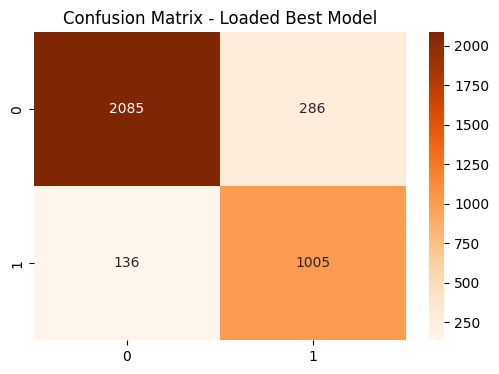

🎉 Congratulations!! Your predictions are complete.


In [40]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Evaluate all models and collect their F1 scores
models = {
    "Model 2 (Adam + Reg)": model_2,
    "Model 3 (RMSprop, no Reg)": model_3,
    "Model 4 (Adam, no Reg)": model_4
}

f1_scores = {}

for name, model in models.items():
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(f"=== {name} Classification Report ===")
    print(classification_report(y_test, y_pred))
    f1 = f1_score(y_test, y_pred)
    f1_scores[name] = f1
    print(f"{name} F1 Score: {f1:.4f}")

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Select the best model based on highest F1 score
best_model_name = max(f1_scores, key=f1_scores.get)
best_model = models[best_model_name]

print(f"Best model selected: {best_model_name} with F1 Score: {f1_scores[best_model_name]:.4f}")

# Save the best model
best_model.save('best_earthquake_model.h5')
print("Best model saved as 'best_earthquake_model.h5'")

# Prediction function for saved model
def make_predictions(model_path, X):
    model = load_model(model_path)
    preds_prob = model.predict(X)
    predictions = (preds_prob > 0.5).astype("int32")
    return predictions

# Use the saved best model to predict on test data
model_path = 'best_earthquake_model.h5'
predictions = make_predictions(model_path, X_test)

print("=== Classification Report for Loaded Model ===")
print(classification_report(y_test, predictions))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Oranges', fmt='d')
plt.title("Confusion Matrix - Loaded Best Model")
plt.show()

print("🎉 Congratulations!! Your predictions are complete.")


Congratulations!!
